# **Install Optuna via Pip**

In [ ]:
#!pip install optuna

# **Basic Structure of Python code with Optuna**
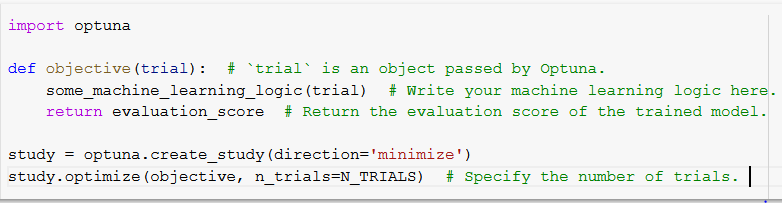

# **Demo - Optimize Machine Learning Model**

## **Import all the required libraries**

In [ ]:
#importing all the required packages
import optuna
from sklearn.datasets import load_iris
import sklearn.linear_model
import sklearn.metrics
from sklearn.model_selection import train_test_split

## **Create an objective function**

In [ ]:
## In optuna, A Trial represents a single call of the objective function
## Study shows an optimization session which contains a set of trials
## Study: optimization based on an objective function
## Trial: a single execution of the objective function

## In this demo, "alpha" is the hyperparameter which is need to be optimized
def objective(trial):
   
    # hyperparameter setting, trial.suggest_uniform will suggest uniform hyperparameter
    #alpha between the range of 0.0 to 2.0, lowest value of interval is closed and 
    #when low=high, it will return low value
    alpha = trial.suggest_uniform('alpha', 0.0, 2.0)
    
    # data loading and train-test split
    X, y = load_iris(return_X_y=True)
    X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
    
    # model training and evaluation
    model = sklearn.linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    error = sklearn.metrics.mean_squared_error(y_val, y_pred)

    # output: evaluation score
    return error

## **Create an study for that ML model and optimize it**

In [ ]:
# In Optuna, we use the study object to manage optimization.
# Method :func:`~optuna.create_study` returns a study object.
# A study object has useful properties for analyzing the optimization outcome.
study = optuna.create_study(direction='minimize') #Set minimize for minimization and maximize for maximization.
#To start the optimization, we create a study object and pass the objective function to method
study.optimize(objective, n_trials=50)

## **Print all the required values**

In [ ]:
# To get the dictionary of parameter name and parameter values:
print("Return a dictionary of parameter name and parameter values:",study.best_params)

# To get the best observed value of the objective function:
print("Return the best observed value of the objective function:",study.best_value)

# To get the best trial:
print("Return the best trial:",study.best_trial)

# To get all trials:
print("Return all the trials:", study.trials)

## **Visualize the above hyperparameter optimization study**

In [ ]:
#importing all the plot functions
from optuna.visualization import plot_edf
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [ ]:
# Visualize the optimization history. See :func:`~optuna.visualization.plot_optimization_history` for the details.
plot_optimization_history(study)

In [ ]:
# Visualize high-dimensional parameter relationships. See :func:`~optuna.visualization.plot_parallel_coordinate` for the details.
plot_parallel_coordinate(study)

In [ ]:
# Visualize individual hyperparameters as slice plot. See :func:`~optuna.visualization.plot_slice` for the details.
plot_slice(study)

In [ ]:
# Visualize parameter importances. See :func:`~optuna.visualization.plot_param_importances` for the details.
#In this case, we have only one parameter.
plot_param_importances(study)

In [ ]:
# Visualize empirical distribution function. See :func:`~optuna.visualization.plot_edf` for the details.
plot_edf(study)